<a href="https://colab.research.google.com/github/Tonmf/ProyectoIML/blob/master/Casos/Caso_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de MLT de Barcelona Telco

## Caso 3: Mobile Virtual Network Operator


## Data

In [ ]:
import os              # Package to use directory command to list files
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Used for plotting the graph
import matplotlib.pyplot as plt
import re

from scipy import stats # for Statistics
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Telco%20Custormer%20Churn/Telco-Customer-Churn.csv')

## Data Exploration

In [ ]:
print(data.shape)
data.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Churn,0,0.0
OnlineSecurity,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

La base de datos está limpia de NaN's pero tiene muchas variables que no son numéricas. A continuación pasamos a transformar estas variables en numéricas.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['customerID'].astype(str))  
data['customerID'] = le.transform(data['customerID'].astype(str))

le.fit(data['gender'].astype(str))  
data['gender'] = le.transform(data['gender'].astype(str))

le.fit(data['Partner'].astype(str))  
data['Partner'] = le.transform(data['Partner'].astype(str))

le.fit(data['Dependents'].astype(str))  
data['Dependents'] = le.transform(data['Dependents'].astype(str))

le.fit(data['PhoneService'].astype(str))  
data['PhoneService'] = le.transform(data['PhoneService'].astype(str))

le.fit(data['MultipleLines'].astype(str))  
data['MultipleLines'] = le.transform(data['MultipleLines'].astype(str))

le.fit(data['InternetService'].astype(str))  
data['InternetService'] = le.transform(data['InternetService'].astype(str))

le.fit(data['OnlineSecurity'].astype(str))  
data['OnlineSecurity'] = le.transform(data['OnlineSecurity'].astype(str))

le.fit(data['OnlineBackup'].astype(str))  
data['OnlineBackup'] = le.transform(data['OnlineBackup'].astype(str))

le.fit(data['DeviceProtection'].astype(str))  
data['DeviceProtection'] = le.transform(data['DeviceProtection'].astype(str))

le.fit(data['TechSupport'].astype(str))  
data['TechSupport'] = le.transform(data['TechSupport'].astype(str))

le.fit(data['StreamingTV'].astype(str))  
data['StreamingTV'] = le.transform(data['StreamingTV'].astype(str))

le.fit(data['StreamingMovies'].astype(str))  
data['StreamingMovies'] = le.transform(data['StreamingMovies'].astype(str))

le.fit(data['Contract'].astype(str))  
data['Contract'] = le.transform(data['Contract'].astype(str))

le.fit(data['PaperlessBilling'].astype(str))  
data['PaperlessBilling'] = le.transform(data['PaperlessBilling'].astype(str))

le.fit(data['PaymentMethod'].astype(str))  
data['PaymentMethod'] = le.transform(data['PaymentMethod'].astype(str))

le.fit(data['MonthlyCharges'].astype(str))  
data['MonthlyCharges'] = le.transform(data['MonthlyCharges'].astype(str))

le.fit(data['TotalCharges'].astype(str))  
data['TotalCharges'] = le.transform(data['TotalCharges'].astype(str))

le.fit(data['Churn'].astype(str))  
data['Churn'] = le.transform(data['Churn'].astype(str))

print(data.shape)
data.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,446,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,802,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,740,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,570,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1033,925,1


In [ ]:
data.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges        int64
TotalCharges          int64
Churn                 int64
tsne-2d-one         float32
tsne-2d-two         float32
dtype: object

### Pairplot

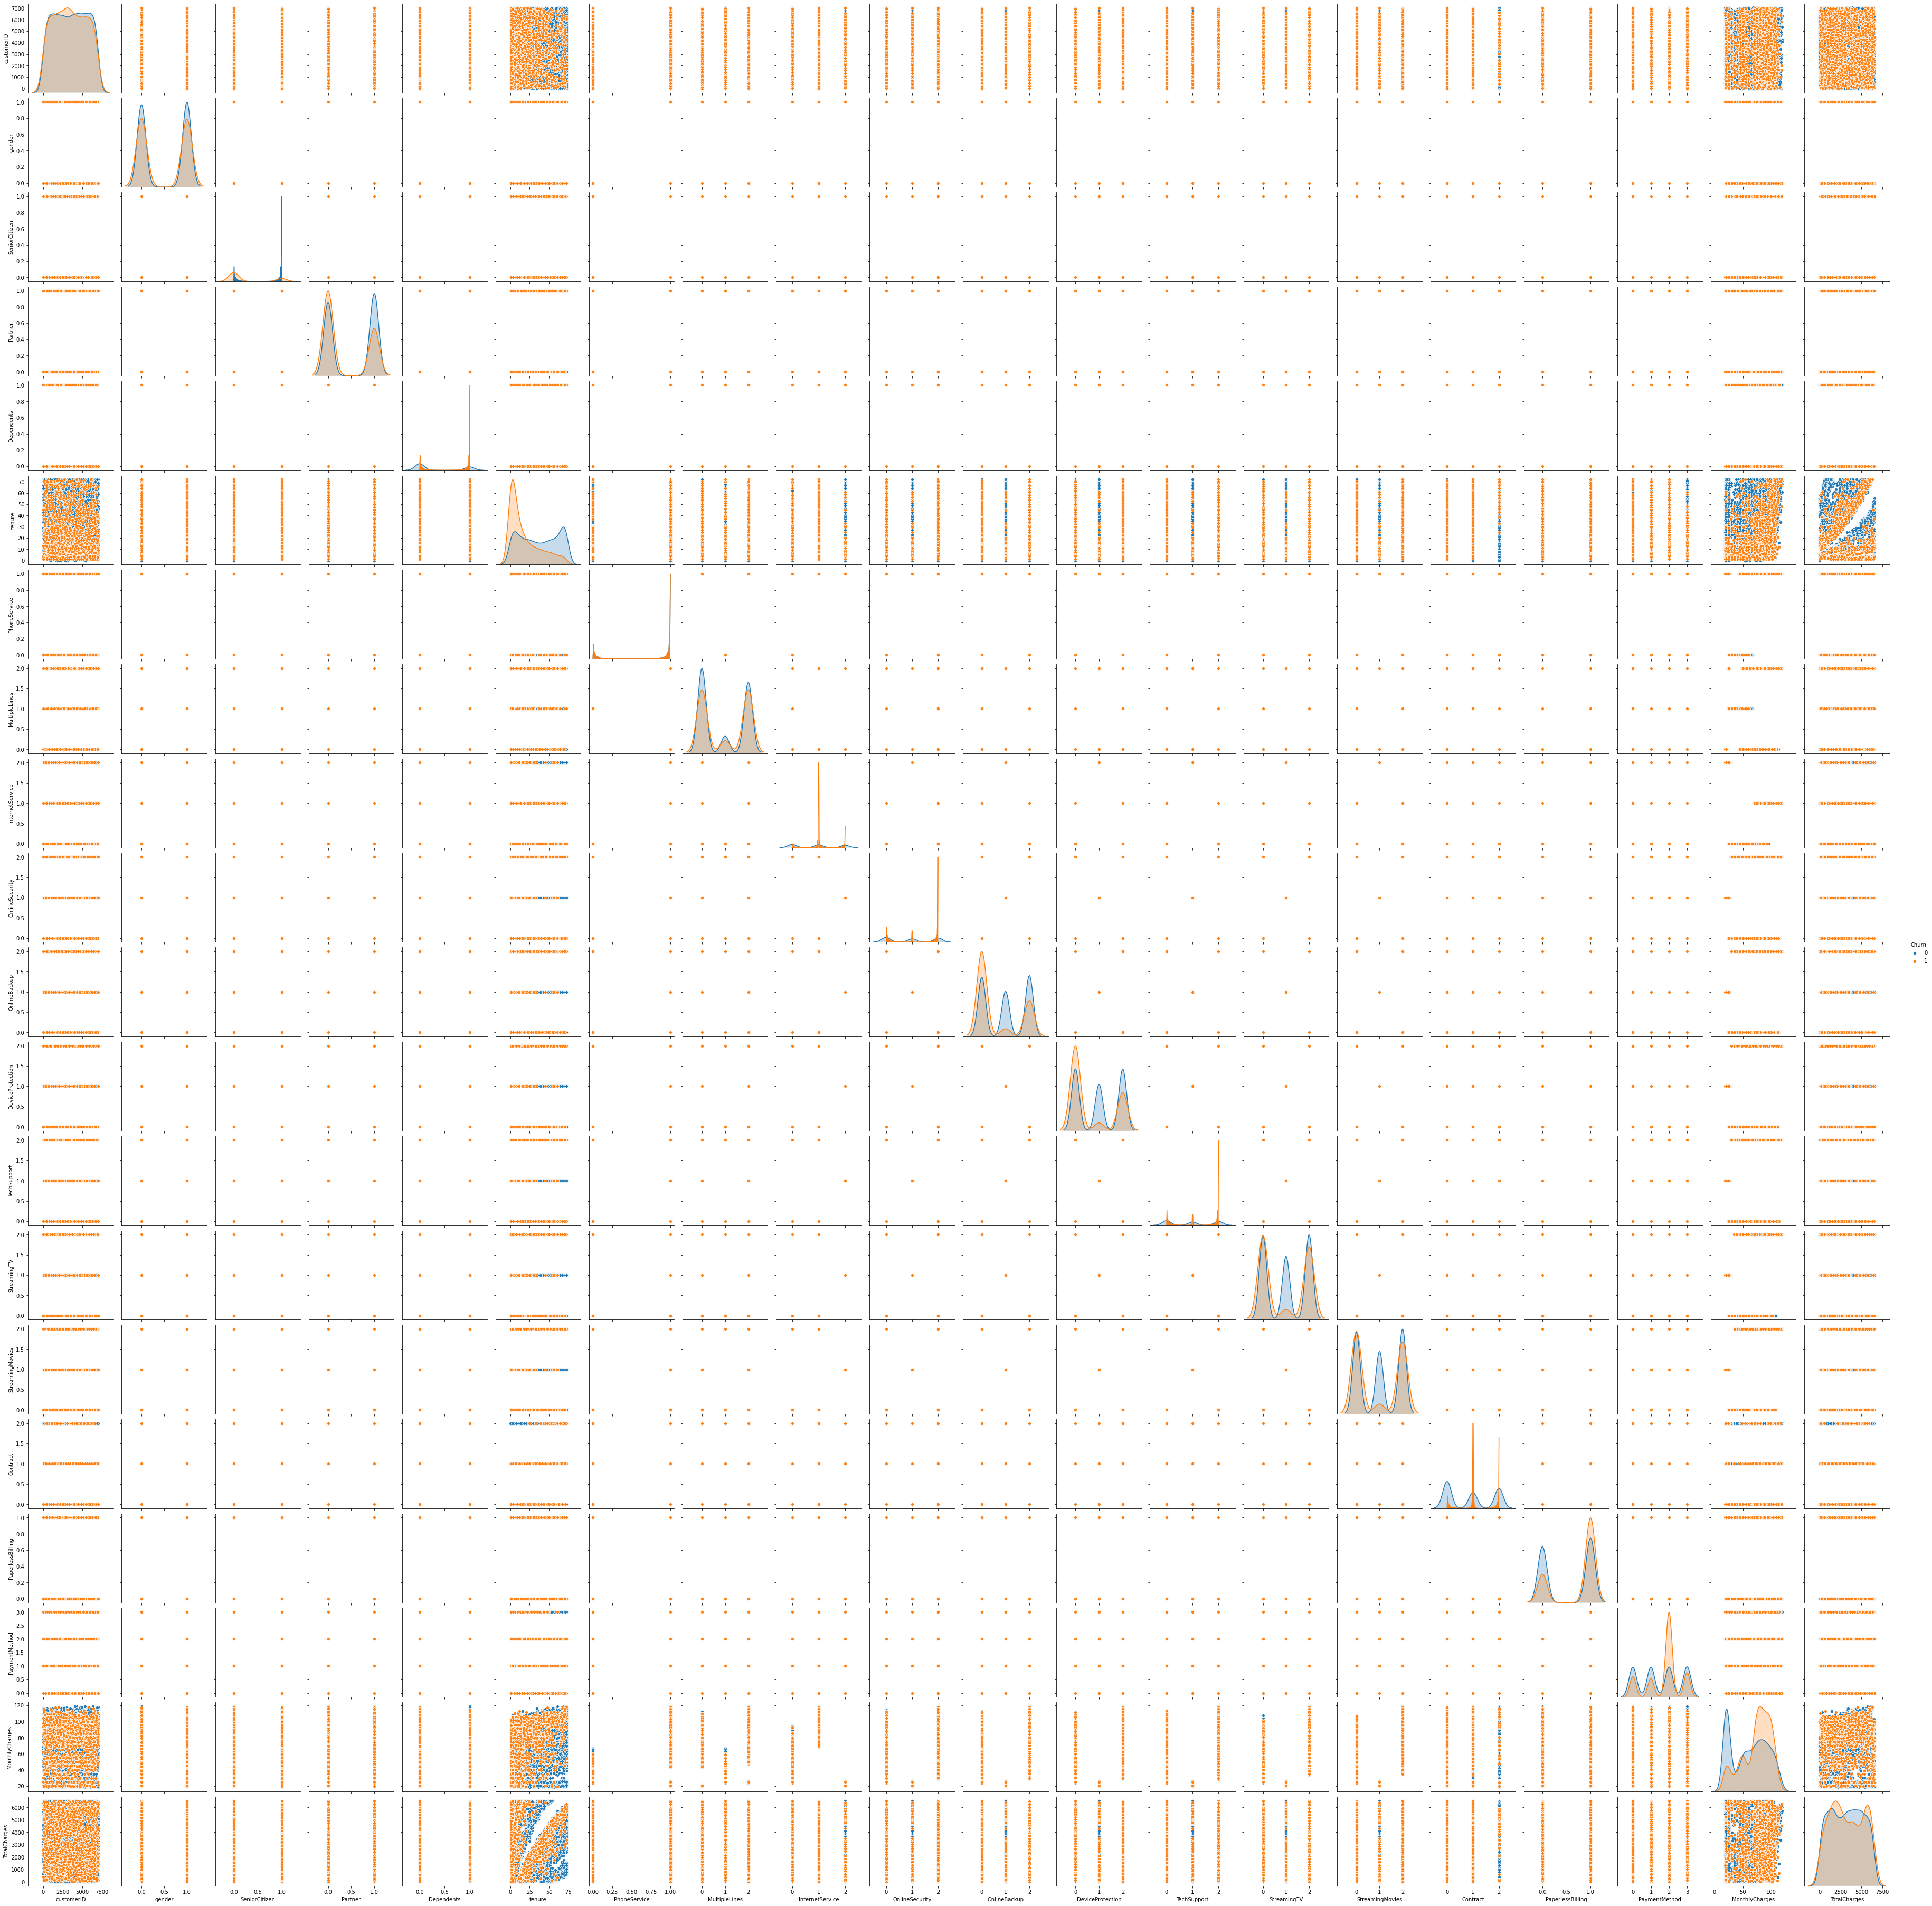

In [ ]:
import pandas as pd
import seaborn as sns
sns.pairplot(data,hue='Churn')
plt.show()

## Algoritmo de Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
target = data['Churn'].values
select_features = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
      'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(data[select_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.2, random_state=42)

### Auto ML

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, 
          per_run_time_limit=30,
          )

# train model(s)
automl.fit(x_train, y_train)

# evaluate
y_hat = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)

In [ ]:
print("Test Accuracy score {0}".format(test_acc))
print(automl.sprint_statistics())
print(automl.show_models())

Test Accuracy score 0.8041163946061036
auto-sklearn results:
  Dataset name: c47213e62e4c08df0ca922a371cf2775
  Metric: accuracy
  Best validation score: 0.801613
  Number of target algorithm runs: 6
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0

[(0.860000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:ran

### Adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
boost = AdaBoostClassifier()
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.98%


## Resultados

Comparación de resultados:
*   Automl: 80,41%
*   Adaboost: 80.98%

 ## Características más importantes

In [ ]:
x=data[select_features]
y=data['Churn']

print('x shape:{}'.format(x.shape))
print('y shape:{}'.format(y.shape))

x shape:(7043, 20)
y shape:(7043,)


### PCA

In [ ]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [ ]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(x)

In [ ]:
print('Valores propios = {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 4134487.0987219834 3566957.90587353 217139.80140863298 585.5373738575041 1.1073973080886768 1.0234856852554772 0.9514569040927351 0.7031085049505246 0.6385956679862866 0.5531082393750045 0.5224163539530405 0.47556843525461306 0.4421617348519954 0.3195377888416196 0.26529662266564186 0.24963901529396246 0.19906496397429066 0.1380760033628269 0.0973941367487867 0.06298471404816863
Fracción de la varianza explicada = 0.5220853793588537 0.45042021585233355 0.027419487081571704 7.393915972157162e-05 1.3983740422679386e-07 1.2924140274137868e-07 1.201459157703998e-07 8.878554020666807e-08 8.063913458107033e-08 6.984414706962536e-08 6.596850681216327e-08 6.005275164790078e-08 5.583429614510831e-08 4.034986776435559e-08 3.350052487280188e-08 3.152334906131559e-08 2.5137073777712276e-08 1.7435648213370622e-08 1.2298515781446285e-08 7.953440787809368e-09


In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 52.20853794,  97.25055952,  99.99250823,  99.99990215,
        99.99991613,  99.99992905,  99.99994107,  99.99994995,
        99.99995801,  99.99996499,  99.99997159,  99.9999776 ,
        99.99998318,  99.99998722,  99.99999057,  99.99999372,
        99.99999623,  99.99999797,  99.9999992 , 100.        ])

In [ ]:
pca.components_

In [ ]:
Xproj = pca.transform(x)
Xproj.shape

(7043, 20)

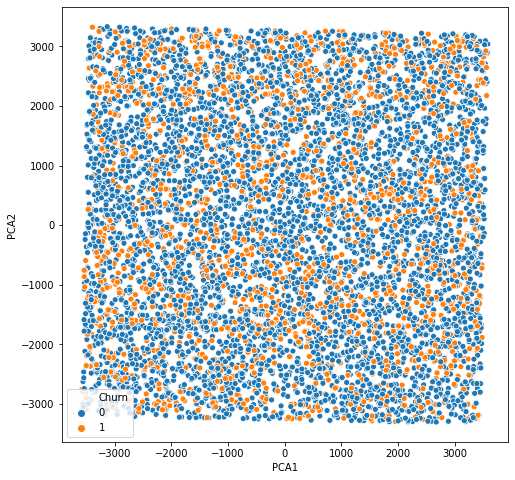

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

### K best

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=3).fit(x, y)
X_new.scores_

array([4.01745398e+03, 2.58698618e-01, 1.34351545e+02, 8.24120826e+01,
       1.33036443e+02, 1.62789237e+04, 9.72606249e-02, 9.74692078e+00,
       9.82102823e+00, 5.51611529e+02, 2.30086520e+02, 1.91303140e+02,
       5.23303866e+02, 7.49020319e+00, 8.23539949e+00, 1.11578017e+03,
       1.05680863e+02, 5.84922505e+01, 5.70283178e+04, 4.50155025e+01])

### T-SNE

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE acabado! tiempo de computo: {} segundos'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7043 samples in 0.021s...
[t-SNE] Computed neighbors for 7043 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7043
[t-SNE] Computed conditional probabilities for sample 2000 / 7043
[t-SNE] Computed conditional probabilities for sample 3000 / 7043
[t-SNE] Computed conditional probabilities for sample 4000 / 7043
[t-SNE] Computed conditional probabilities for sample 5000 / 7043
[t-SNE] Computed conditional probabilities for sample 6000 / 7043
[t-SNE] Computed conditional probabilities for sample 7000 / 7043
[t-SNE] Computed conditional probabilities for sample 7043 / 7043
[t-SNE] Mean sigma: 24.970514
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.933029
[t-SNE] KL divergence after 300 iterations: 1.993533
t-SNE acabado! tiempo de computo: 17.103142261505127 segundos


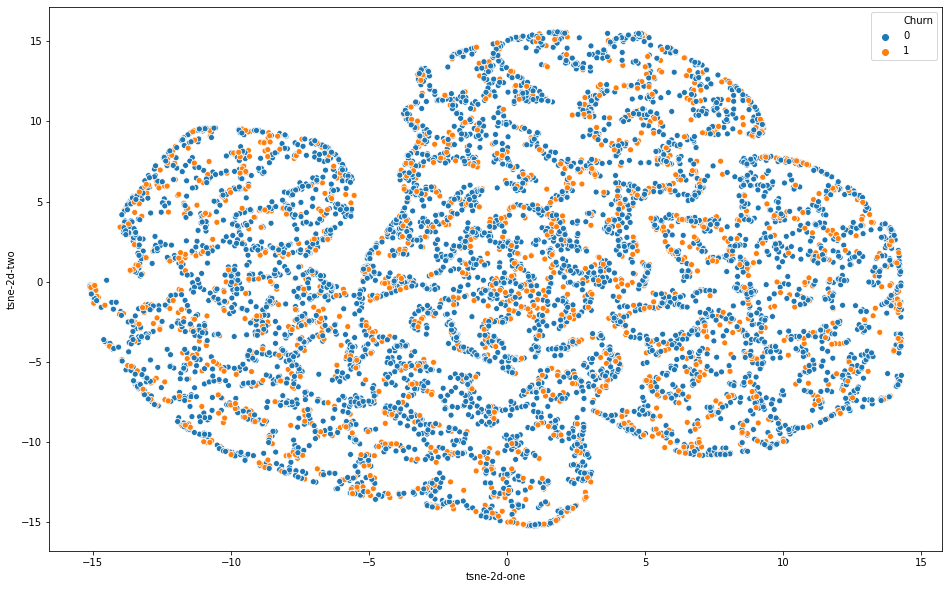

In [ ]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Churn",
    data=data,
    legend="full",
)

### Recursive feature elimination

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False False False False False False False False False False
 False False False  True  True False False False]
Raking of the features: [18 13  3  6 11 14  9 12 15  5  4 10  2  7  8  1  1 16 17 19]


Kept features: [False False False False False False False False False False False False
 False False False  True  True False False False]
 
Raking of the features: [18 13  3  6 11 14  9 12 15  5  4 10  2  7  8  1  1 16 17 19]

In [ ]:
x.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Las métricas más importantes según SVC son **Contract** y **PaperlessBilling**.

### Visualización

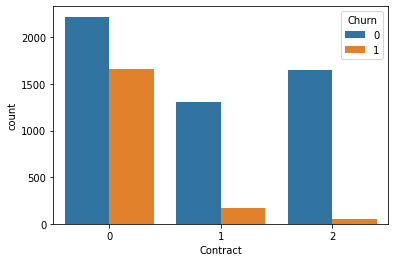

In [ ]:
import seaborn as sns  # Used for plotting the graph
import matplotlib.pyplot as plt
import re

plt.figure()
ax = sns.countplot(x='Contract',hue="Churn", data=data)
plt.show()

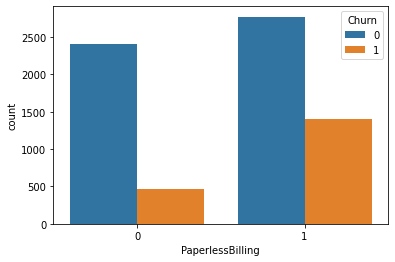

In [ ]:
plt.figure()
ax = sns.countplot(x='PaperlessBilling',hue="Churn", data=data)
plt.show()

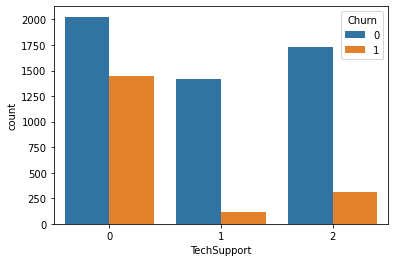

In [ ]:
plt.figure()
ax = sns.countplot(x='TechSupport',hue="Churn", data=data)
plt.show()

### AdaBoost con 2 features

In [ ]:
from sklearn.preprocessing import StandardScaler
target2 = data['Churn'].values
select_features2 = ['Contract', 'PaperlessBilling']


scaler2 = StandardScaler()
dfScaled2 = scaler2.fit_transform(data[select_features2])

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(dfScaled2, target2, test_size=0.2, random_state=42)

In [ ]:
boost2 = AdaBoostClassifier()
boost2.fit(x_train2, y_train2)

y_pred2 = boost2.predict(x_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.53%


### AdaBoost con 4 features

In [ ]:
from sklearn.preprocessing import StandardScaler
target4 = data['Churn'].values
select_features4 = ['Contract', 'PaperlessBilling','TechSupport','SeniorCitizen']


scaler4 = StandardScaler()
dfScaled4 = scaler4.fit_transform(data[select_features4])

In [ ]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(dfScaled4, target, test_size=0.2, random_state=42)

In [ ]:
boost4 = AdaBoostClassifier()
boost4.fit(x_train4, y_train4)

y_pred4 = boost4.predict(x_test4)
accuracy = accuracy_score(y_test4, y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.22%


 ## Discusión y Conclusiones

Comparación de resultados:
*   Automl: 80,41%
*   Adaboost: 80.98%
*   Adaboost con 2 features: 73.53%
*   Adaboost con 4 features: 77.22%

## Linias de desarrollo futuro

### Annexo 1


### Annexo 2